# AI Feynman 2.0: Learning Regression Equations From Data

### Clone repository and install dependencies

In [1]:
!git clone https://github.com/SJ001/AI-Feynman.git
!cd /content/AI-Feynman && git reset --hard 28edde1a36a166a081de84999ab4fd40071957db

Cloning into 'AI-Feynman'...
remote: Enumerating objects: 525, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 525 (delta 11), reused 25 (delta 9), pack-reused 493
Receiving objects: 100% (525/525), 31.36 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (318/318), done.
HEAD is now at 28edde1 Add files via upload


Look at what we downloaded

In [2]:
!ls /content/AI-Feynman
# %pycat AI-Feynman/requirements.txt if you need to fix the dependencies

Code  example_data  LICENSE  README.md	requirements.txt


Fix broken requirements file (may not be needed if later versions fix this).

In [3]:
%%writefile AI-Feynman/requirements.txt
torch>=1.4.0
matplotlib
sympy==1.4
pandas
scipy
sortedcontainers

Overwriting AI-Feynman/requirements.txt


Install dependencies not already installed in Google Collab

In [4]:
!pip install -r AI-Feynman/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 8.6 MB/s 
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1


Check that fortran is installed

In [5]:
!gfortran --version

GNU Fortran (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Check the OS version

In [6]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


Install the csh shell

In [7]:
!sudo apt-get install csh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  csh
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 243 kB of archives.
After this operation, 358 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 csh amd64 20110502-3ubuntu0.18.04.1 [243 kB]
Fetched 243 kB in 1s (444 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

Set loose permissions to avoid some reported file permissions issues

In [8]:
!chmod +777 /content/AI-Feynman/Code/*

### Compile the fortran code

Look at the code directory

In [9]:
!ls -l /content/AI-Feynman/Code

total 1244
-rwxrwxrwx 1 root root     11 Jun  7 09:48 10ops.txt
-rwxrwxrwx 1 root root     15 Jun  7 09:48 14ops.txt
-rwxrwxrwx 1 root root     19 Jun  7 09:48 19ops.txt
-rwxrwxrwx 1 root root      8 Jun  7 09:48 7ops.txt
-rwxrwxrwx 1 root root    138 Jun  7 09:48 ai_feynman_example.py
-rwxrwxrwx 1 root root   1287 Jun  7 09:48 ai_feynman_terminal_example.py
-rwxrwxrwx 1 root root 960508 Jun  7 09:48 arity2templates.txt
-rwxrwxrwx 1 root root    653 Jun  7 09:48 brute_force_oneFile_mdl_v2.scr
-rwxrwxrwx 1 root root    654 Jun  7 09:48 brute_force_oneFile_mdl_v3.scr
-rwxrwxrwx 1 root root    541 Jun  7 09:48 brute_force_oneFile_v1.scr
-rwxrwxrwx 1 root root    608 Jun  7 09:48 brute_force_oneFile_v2.scr
-rwxrwxrwx 1 root root    609 Jun  7 09:48 brute_force_oneFile_v3.scr
-rwxrwxrwx 1 root root    616 Jun  7 09:48 compile.sh
-rwxrwxrwx 1 root root   4444 Jun  7 09:48 dimensionalAnalysis.py
-rwxrwxrwx 1 root root   6168 Jun  7 09:48 get_pareto.py
-rwxrwxrwx 1 root root   1745 Jun  7 09:4

Compile .f files into .x files

In [10]:
!cd /content/AI-Feynman/Code/ && ./compile.sh

### Run the first example from the AI-Feynman repository

Change working directory to the Code directory

In [11]:
import os
os.chdir("/content/AI-Feynman/Code/")
print(os.getcwd())

/content/AI-Feynman/Code


In [12]:
!pwd

/content/AI-Feynman/Code


Check that the bruteforce code runs without errors

In [13]:
from S_brute_force import brute_force
brute_force("/content/AI-Feynman/example_data/","equation4.txt",30,"14ops.txt")

1

Look at the first line of the example 1 file

In [14]:
!head -n 1 /content/AI-Feynman/example_data/equation4.txt

4.725218875	1.735492125	4.956654512	1.984023577	6.44261068


In [ ]:
# Example 1 has data generated from an equation, where the last column is the regression target, and the rest of the columns are the input data
# The following example shows the relationship between the first line of the file example1.txt and the formula used to make the data
x=[1.6821347439986711,1.1786188905177983,4.749225735259924,1.3238356535004034,3.462199507094163]
x0,x1,x2,x3=x[0],x[1],x[2],x[3]
(x0**2 - 2*x0*x1 + x1**2 + x2**2 - 2*x2*x3 + x3**2)**0.5

3.4621995070941636

Run the code. It takes a long time, so go get some coffee.

In [15]:
from S_run_aifeynman import run_aifeynman
# Run example 1 as the regression dataset
run_aifeynman("/content/AI-Feynman/example_data/","equation4.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=400)

Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[45.87818267439574, 31.45099156544488, '0.000051736747*exp(sqrt(exp(x1)))']
[47.364837379700745, 30.73171343069086, '0.067123257837*exp(x1)']
[47.858652548298366, 30.120389906373806, x0 + 0.638013660907745]
[48.37105017175968, 30.112879076869948, 3.64029872417450]
[56.68919803762227, 30.048355590523133, x1 + log(x0) - 0.371791124343872]
[58.579597678170934, 29.98524065699895, '-0.344592659630+(x1-cos((x3-x2)))']
[68.15066022535952, 29.26224541220321, '-0.663063957902*(x1*((cos((x3-x2))-1)-1))']
[154.87386421513767, 29.03767695475516, -0.703660547733307*x0*cos(x2 - 1.00423872470856*x3) + 1.26931965351105*x0]
[158.82639594986074, 29.003654141162922, -0.72329169511795*x0*cos(x2 - 0.999126970767975*x3) + x0 + 1.08865141868591]
[158.8519318645875, 28.99086369189027, -0.728763282299042*x1*cos(x2 - 1.00113439559937*x3) + x1 + 1.09756743907928]
[1465.0578966546868, 28.805010734468862, '-0.

### Assess the results

In [16]:
!cat results.dat 

      1.000000000000                      0               1             1.0000            26.5754            49.8289            49.8289
      0.000000000000                    0J~              25             0.0000             4.6439             4.6439             4.6439


We found a candidate with an excellent fit, let's see what we got

In [17]:
!ls -l /content/AI-Feynman/Code/results/

total 72
drwxr-xr-x 2 root root 4096 Jun  7 10:48 mystery_world_acos
drwxr-xr-x 2 root root 4096 Jun  7 10:48 mystery_world_asin
drwxr-xr-x 2 root root 4096 Jun  7 10:48 mystery_world_atan
drwxr-xr-x 2 root root 4096 Jun  7 10:49 mystery_world_cos
drwxr-xr-x 2 root root 4096 Jun  7 10:51 mystery_world_exp
drwxr-xr-x 2 root root 4096 Jun  7 10:52 mystery_world_inverse
drwxr-xr-x 2 root root 4096 Jun  7 10:53 mystery_world_log
drwxr-xr-x 2 root root 4096 Jun  7 10:54 mystery_world_sin
drwxr-xr-x 2 root root 4096 Jun  7 10:56 mystery_world_sqrt
drwxr-xr-x 2 root root 4096 Jun  7 10:57 mystery_world_squared
drwxr-xr-x 2 root root 4096 Jun  7 10:58 mystery_world_tan
drwxr-xr-x 3 root root 4096 Jun  7 10:07 NN_trained_models
-rw-r--r-- 1 root root 1373 Jun  7 11:29 solution_before_snap_equation4.txt.txt
-rw-r--r-- 1 root root 2198 Jun  7 11:32 solution_equation4.txt
-rw-r--r-- 1 root root 1373 Jun  7 11:29 solution_first_snap_equation4.txt.txt
drwxr-xr-x 2 root root 4096 Jun  7 10:11 transla

In [18]:
!ls -l /content/AI-Feynman/Code/results/NN_trained_models/models

total 792
-rw-r--r-- 1 root root 132811 Jun  7 10:08 equation4.txt_train.h5
-rw-r--r-- 1 root root 132299 Jun  7 10:28 equation4.txt_train-translated_minus.h5
-rw-r--r-- 1 root root 132299 Jun  7 10:11 equation4.txt_train-translated_minus_pretrained.h5
-rw-r--r-- 1 root root 131787 Jun  7 10:46 equation4.txt_train-translated_minus-translated_plus.h5
-rw-r--r-- 1 root root 131787 Jun  7 10:29 equation4.txt_train-translated_minus-translated_plus_pretrained.h5
-rw-r--r-- 1 root root 131211 Jun  7 10:47 equation4.txt_train-translated_minus-translated_plus-translated_multiply_pretrained.h5


In [19]:
!cat /content/AI-Feynman/Code/results/solution_equation4.txt

31.60750441493712 4.982167759328298 498216.77593282977 0.0 31.606902663440323 0
30.873231836066854 4.835096718857622 483509.67188576225 1.0 28.54362613351337 exp(-0.000000000000*exp((((x2-x3)*exp((x0+x1))))**(-1)))
31.604340405934845 4.8260711001977175 482607.11001977173 19.37937836707126 28.36561227946743 1/(666.000000000000*(log((x0+x1))/(x0+x1)))
31.299578304666845 4.771224506507327 477122.4506507327 45.251633893196825 27.307484291870583 0.418889191645090
30.72386300166433 4.7466563025319175 474665.63025319175 46.78464226977325 26.8463919308807 1.21221780776978
30.724280393232515 4.746508062370731 474650.8062370731 93.76161983570555 26.84363354542913 tan(0.887731075286865*x3**(-0.00738819967955351))
30.73363007640368 4.746365982834271 474636.59828342707 95.84481244516975 26.840990060072013 tan(0.0362291189120284*x1 + 0.76712429523468)
30.735734286235147 4.746075524035798 474607.5524035798 95.85394707732041 26.835586688779376 tan(0.0365045019681862*x0 + 0.76617306470871)
30.749329067

Note in the cell above that the solution with the lowest error is the formula this data was generated from

### Try our own dataset generation and equation learning

The code below generates our regression example dataset

We generate points for 4 columns, where x0 is from the same equation as x1, and x2 is from the same equation as x3
The last column is Y

In [ ]:
import os
import random

os.chdir("/content/AI-Feynman/example_data")

def getY(m,v,u,w):
  y = 1/2*m*(v**2+u**2+w**2)
  return y

def getRow():
  [m,v,u,w]=[random.random() for x in range(4)]
  y=getY(m,v,u,w)
  return str(m)+" "+str(v)+" "+str(u)+" "+str(w)+" "+str(y)+"\n"

with open("Examplec.txt", "w") as f:
  for _ in range(10000):
    f.write(getRow())
f.close()

# switch back to the code directory
os.chdir("/content/AI-Feynman/Code")

Let's look at our data

In [ ]:
!head -n 10 ../example_data/duplicateVarsExample.txt

Let's also plot the data for x01 and x23 against Y

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

df=pd.read_csv("../example_data/duplicateVarsExample.txt",sep=" ",header=None)
df.plot.scatter(x=0, y=4)
df.plot.scatter(x=2, y=4)

Now we run the experiment, and go get more coffee, because this is not going to be fast...

In [ ]:
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/AI-Feynman/example_data/","duplicateVarsExample.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=400)

Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[29.0, 7.068485265203357e-08, '3.000000000000+log(sqrt(exp((x2-x0))))']
Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[29.0, 7.068485265203357e-08, '3.000000000000+log(sqrt(exp((x2-x0))))']
Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[29.0, 7.068485265203357e-08, '3.000000000000+log(sqrt(exp((x2-x0))))']
Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[29.0, 7.068485265203357e-08, '3.000000000000+log(sqrt(exp((x2-x0))))']
Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[0.0, 28.417163061949132, '1/(666.000000000000+(sin(pi))**(-1))']
[29.0, 7.068485265203357e-08, '3.000000000000+log(sqrt(exp((x2-x0))))']
Checking for brute force + 

Checking for br

Initial models quickly mapped to x0 and x2 (the system realized x1 and x3 are duplicates and so not needed)

Later on the system found 3.000000000000+log(sqrt(exp((x2-x1)))) which is a bit crazy but looks like a plane

We can see on Wolfram alpha that an equivalent form of this equation is:

(x2 - x1)/2 + 3.000000000000 

which is what we used to generate the dataset!

Link: https://www.wolframalpha.com/input/?i=3.000000000000%2Blog%28sqrt%28exp%28%28x2-x1%29%29%29%29

In [ ]:
!ls -l /content/AI-Feynman/Code/results/

total 88
drwxr-xr-x 2 root root 4096 May 23 13:33 mystery_world_acos
drwxr-xr-x 2 root root 4096 May 23 13:34 mystery_world_asin
drwxr-xr-x 2 root root 4096 May 23 13:35 mystery_world_atan
drwxr-xr-x 2 root root 4096 May 23 13:36 mystery_world_cos
drwxr-xr-x 2 root root 4096 May 23 13:37 mystery_world_exp
drwxr-xr-x 2 root root 4096 May 23 13:38 mystery_world_inverse
drwxr-xr-x 2 root root 4096 May 23 13:39 mystery_world_log
drwxr-xr-x 2 root root 4096 May 23 13:39 mystery_world_sin
drwxr-xr-x 2 root root 4096 May 23 13:40 mystery_world_sqrt
drwxr-xr-x 2 root root 4096 May 23 13:40 mystery_world_squared
drwxr-xr-x 2 root root 4096 May 23 13:41 mystery_world_tan
drwxr-xr-x 3 root root 4096 May 23 11:55 NN_trained_models
drwxr-xr-x 2 root root 4096 May 23 12:58 separable_add
-rw-r--r-- 1 root root  258 May 23 13:42 solution_before_snap_duplicateVarsExample.txt.txt
-rw-r--r-- 1 root root  160 May 23 12:47 solution_before_snap_example1.txt.txt
-rw-r--r-- 1 root root  493 May 23 13:42 solut

In [ ]:
!cat /content/AI-Feynman/Code/results/solution_duplicateVarsExample.txt

31.581778404445394 4.828690629737295 48286.90629737295 0.0 28.417163061949132 1/(666.000000000000+(sin(pi))**(-1))
26.833966784432945 4.746480350409578 47464.80350409578 2.0 26.84311792531227 3.00000000000000
26.833966784432945 4.746185194393747 47461.85194393747 10.754887502163468 26.837626745880836 (1.5*(x0/x1) + 1.5)+(sqrt(-1.000000000000+((x2+1)-x2)))
3.1042861079542714e-08 -24.9387673881546 -249387.67388154598 24.651484454403228 3.109445586250041e-08 0.5*log(exp(-1.0*x0 + x2)) + 3.0


The solver settled on *log(sqrt(exp(-x1 + x3))) + 3.0* which we know is correct

Now, that was a bit of a softball problem as it has an exact solution. Let's now add noise to the dataset and see how the library holds up

### Let's add small amount of noise to every variabe and see the fit quality

We do the same thing as before, but now we add or subtract noise to x0,x1,x2,x3 after generating y

In [ ]:
import os
import random
import numpy as np

os.chdir("/content/AI-Feynman/example_data")

def getY(x01,x23):
  y = -0.5*x01+0.5*x23+3
  return y

def getRow():
  x=[random.random() for x in range(4)]
  x[1]=x[0]
  x[3]=x[2]
  y=getY(x[1],x[3])
  mu=0
  sigma=0.05
  noise=np.random.normal(mu, sigma, 4)
  x=x+noise
  return str(x[0])+" "+str(x[1])+" "+str(x[2])+" "+str(x[3])+" "+str(y)+"\n"

with open("duplicateVarsWithNoise100k.txt", "w") as f:
  for _ in range(100000):
    f.write(getRow())
f.close()

# switch back to the code directory
os.chdir("/content/AI-Feynman/Code")

Let's have a look at the data

In [ ]:
!head -n 20 ../example_data/duplicateVarsWithNoise100k.txt

0.24658538894044763 0.13528964909109784 0.7167726232164163 0.7613120782784784 3.2656571497233786
0.2744040465350253 0.22317445738298491 0.22430267199045523 0.26809637801190395 3.0181081263737215
-0.012179437736629266 0.13175034433494237 0.45762143661421895 0.505653926918747 3.2226869325112513
0.8709211751354147 0.9791763375471095 0.14712982438738045 0.13246639853674866 2.5897597225282847
0.27261467565387654 0.36572759769000307 0.34024664201389243 0.40912560582738366 3.015864739527045
0.43253988893728534 0.37860683920153904 0.013577517341750335 0.06781195506790083 2.7866547678093876
0.9110207591374523 0.8733512599139964 0.5663716610173677 0.6014830839798686 2.8456507353167524
0.9795695029287032 0.9190975772304248 0.6232141532118675 0.5961506288289266 2.837360094281111
0.22845677552495508 0.19391464651128826 0.44802027841275277 0.35270070599824 3.1006802445665063
0.6595280064935026 0.692156853631994 0.22211600273205026 0.1993943083609775 2.7216271055639694
0.5237647068075513 0.5168276493

Now let's plot the data

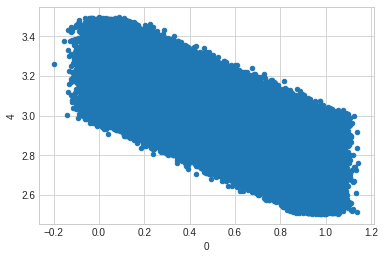

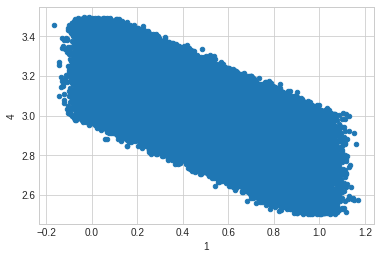

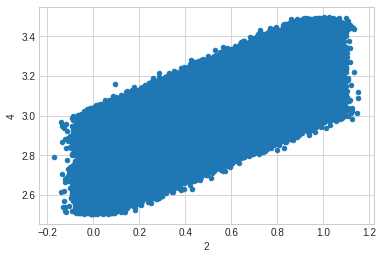

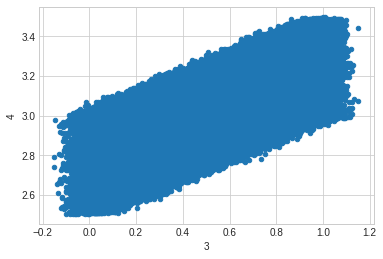

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

df=pd.read_csv("../example_data/duplicateVarsWithNoise100k.txt",sep=" ",header=None)
df.plot.scatter(x=0, y=4)
df.plot.scatter(x=1, y=4)
df.plot.scatter(x=2, y=4)
df.plot.scatter(x=3, y=4)

In [ ]:
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/AI-Feynman/example_data/","duplicateVarsWithNoise100k.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=600)

Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[44.87052513523241, 26.91401828379588, '-0.080410728286+pi']
[48.09194877783831, 26.835945935286453, 2.99998533725739]
[52.372814580925414, 26.57617583325315, cos(x0) + 2.1598539352417]
[58.32994587457764, 26.57528754714436, '1.769022682129+sqrt((x2+1))']
[58.57398871319263, 26.32626357847806, '2.793420736004+(x3/((x0+1)+1))']
[58.58148203693512, 26.323341844310665, '2.807967441813+(x2/((x0+1)+1))']
[60.71188352073511, 25.13221764830332, '3.021468115532+(cos(x0)-cos(x3))']
[64.71669142579017, 24.759406291459783, '3.031554214430+((x3-x0)/(pi-1))']
[67.61789036815233, 24.742397397015846, '3.033791703770+((x3-x0)/((cos(x3))**(-1)+1))']
[71.16498974901769, 24.697915192622236, '2.009047906648+sqrt((sin((x3-sin(x0)))+1))']
[72.1692487654074, 24.542400611551233, '4.029975261394+(-sqrt(exp(sin((x0-x3)))))']
[78.0865028781028, 24.303487658958183, '2.988682309278*sqrt(exp(sin(((x3-x0)/pi))))

In [ ]:
!cat /content/AI-Feynman/Code/results/solution_duplicateVarsWithNoise100k.txt

In [ ]:
!cp -r /content/AI-Feynman /content/gdrive/My\ Drive/Lemay.ai_research/

In [ ]:
# from S_run_aifeynman import run_aifeynman
# run_aifeynman("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data/","duplicateVarsWithNoise.txt",30,"19ops.txt", polyfit_deg=3, NN_epochs=1000)

In [ ]:
import os
import random
import numpy as np
os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data")

def getY(x01,x23):
  y = -0.5*x01+0.5*x23+3
  return y

def getRow():
  x=[0 for x in range(4)]
  x[1]=random.random()
  x[3]=random.random()
  y=getY(x[1],x[3])
  mu=0
  sigma=0.05
  noise=np.random.normal(mu, sigma, 4)
  x=x+noise
  return str(x[1])+" "+str(x[3])+" "+str(y)+"\n"

with open("varsWithNoise.txt", "w") as f:
  for _ in range(100000):
    f.write(getRow())
f.close()

# switch back to the code directory
os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/Code")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

df=pd.read_csv("../example_data/varsWithNoise.txt",sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)

In [ ]:
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data/","varsWithNoise.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=1000)